In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

## Channel的部分

In [5]:
x_train = x_train.reshape(60000, 28, 28, 1) / 255

In [6]:
x_test = x_test.reshape(10000, 28, 28, 1) / 255

In [7]:
x_train[87].shape

(28, 28, 1)

In [8]:
y_train[87]

7

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 讀入函式

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

## 打造函數學習機

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(20, (2,2), padding='same',input_shape=(28,28,1),activation='relu'))
# 第一層，Con2D，12個filter，2*2的矩陣去掃

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))
# 第二層為MaxPooling

In [15]:
model.add(Conv2D(40, (2,2), padding='same', activation='relu'))
# 第三層，因為第一次是12，所以第二次就改成24

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))
# 第四層

In [17]:
model.add(Conv2D(80, (2,2), padding='same',activation='relu'))
# 第五層

In [18]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
model.add(Flatten())
# 拉平

In [20]:
model.add(Dense(54, activation='relu'))

In [21]:
model.add(Dense(10, activation='softmax'))
# 輸出10不能改

## 檢視神經網路

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 40)        3240      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 40)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 80)          12880     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 80)          0         
_________________________________________________________________
flatten (Flatten)            (None, 720)               0

In [29]:
(2*2+1)*20

100

In [24]:
(2*2*12+1)*24
# 稍微試算一下

1176

In [25]:
model.compile(loss='mae', optimizer=SGD(lr=0.078),metrics=['accuracy'])
# loss function改成mae，learning rate=0.078

## 訓練

In [26]:
model.fit(x_train, y_train, batch_size=150, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 212s 4ms/sample - loss: 0.1796 - accuracy: 0.1241
Epoch 2/20
60000/60000 [==============================] - 178s 3ms/sample - loss: 0.1790 - accuracy: 0.1912
Epoch 3/20
60000/60000 [==============================] - 166s 3ms/sample - loss: 0.1776 - accuracy: 0.2233
Epoch 4/20
60000/60000 [==============================] - 164s 3ms/sample - loss: 0.1700 - accuracy: 0.2725
Epoch 5/20
60000/60000 [==============================] - 164s 3ms/sample - loss: 0.1292 - accuracy: 0.3977
Epoch 6/20
60000/60000 [==============================] - 166s 3ms/sample - loss: 0.1171 - accuracy: 0.4360
Epoch 7/20
60000/60000 [==============================] - 172s 3ms/sample - loss: 0.1137 - accuracy: 0.4468
Epoch 8/20
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.1121 - accuracy: 0.4505
Epoch 9/20
60000/60000 [==============================] - 165s 3ms/sample - loss: 0.1111 - accuracy: 0.4529
Epoch

In [30]:
model.fit(x_train, y_train, batch_size=150, epochs=20)
# 因為準確率只有0.6，所以再做20次

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 216s 4ms/sample - loss: 0.0809 - accuracy: 0.6021
Epoch 2/20
60000/60000 [==============================] - 179s 3ms/sample - loss: 0.0804 - accuracy: 0.6043
Epoch 3/20
60000/60000 [==============================] - 169s 3ms/sample - loss: 0.0801 - accuracy: 0.6055
Epoch 4/20
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.0797 - accuracy: 0.6076
Epoch 5/20
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.0794 - accuracy: 0.6086
Epoch 6/20
60000/60000 [==============================] - 164s 3ms/sample - loss: 0.0790 - accuracy: 0.6104
Epoch 7/20
60000/60000 [==============================] - 165s 3ms/sample - loss: 0.0787 - accuracy: 0.6110
Epoch 8/20
60000/60000 [==============================] - 164s 3ms/sample - loss: 0.0786 - accuracy: 0.6119
Epoch 9/20
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.0783 - accuracy: 0.6132
Epoch

### 花了兩個小時跑出來的結果準確率還是很低QQ

## 預測

In [34]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [35]:
result = model.predict_classes(x_test)

In [36]:
def my_predict(n):
    print('我可愛的 CNN 預測是', class_names[result[n]])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap='Greys')

我可愛的 CNN 預測是 Pullover


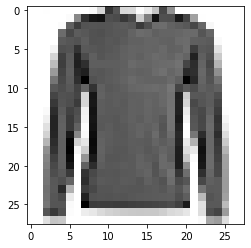

In [37]:
my_predict(55)